<a href="https://colab.research.google.com/github/NotMajooj/lia1_2025_2/blob/main/Entregas%20-%20Maria%20J%C3%BAlia%20Bicharelli%20da%20Silva/GastoDeEnergia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<hr>
<div class="container">
    <img src='https://raw.githubusercontent.com/NotMajooj/lia1_2025_2/main/Entregas%20-%20Maria%20J%C3%BAlia%20Bicharelli%20da%20Silva/image1.jpeg' align='left' width='200'  height='200' />
</div>

<h1> <font color='lightblue'>Projeto Matéria LIA1 - Previsão de Consumo de Energia</font></h1>
Notebook desenvolvido por: <a href="https://github.com/NotMajooj" style="color:lightyellow;">Maria Júlia Bicharelli da Silva</a>
<hr>

Este notebook realiza a previsão do consumo de energia elétrica com base em dados horários da <font color='lightblue'>**AEP Hourly Energy Consumption**</font> disponibilizados no <font color='lightblue'>***Kaggle***</font>:

Link do dataset: <a href="https://www.kaggle.com/datasets/robikscube/hourly-energy-consumption?utm_source=chatgpt.com" target="_blank" style="color:lightyellow;">Clique aqui</a>

O projeto consiste em:
<ul>
    <li>Tratar dados ausentes e duplicados</li>
    <li>Remover outliers e preparar variáveis temporais</li>
    <li>Treinar modelo de previsão do consumo (regressão)</li>
    <li>Permitir que o usuário insira hora, dia e mês e veja a previsão de consumo</li>
</ul>

Espero que goste e que este notebook seja útil para análise e previsão de energia! ⚡
<hr>

### Apresentação da base de dados
A base de dados **AEP Hourly Energy Consumption** será usada para análise e previsão de consumo de energia elétrica.
<br><br>
<center>
<div style="display:inline-block;">
    <div>
        <div style="padding: 10px; float: left; text-align: center; font-size: 50px;">
            ⚡
            <div>Consumo Horário</div>
        </div>
        <div style="padding: 10px; float: left; text-align: center; font-size: 50px;">
            🕒
            <div>Consumo Diário</div>
        </div>
        <div style="padding: 10px; float: left; text-align: center; font-size: 50px;">
            📅
            <div>Consumo Mensal</div>
        </div>
    </div>
</div>
</center>


In [14]:
import matplotlib.pyplot as plt
from platform import python_version

print(f'A versão da linguagem Python usada neste projeto é a {python_version()}!')

A versão da linguagem Python usada neste projeto é a 3.12.11!


##Importações e Carregamento do Dataset

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns

df_dataset = pd.read_csv('/content/AEP_hourly.csv', index_col=0, parse_dates=True)

if 'AEP_MW' in df_dataset.columns:
    df_dataset.rename(columns={'AEP_MW': 'consumo_MW'}, inplace=True)

print('Dados importados com sucesso!')
display(df_dataset.head())
df_dataset.info()

Dados importados com sucesso!


,consumo_MW
Datetime,
2004-12-31 01:00:00,13478.0
2004-12-31 02:00:00,12865.0
2004-12-31 03:00:00,12577.0
2004-12-31 04:00:00,12517.0
2004-12-31 05:00:00,12670.0


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121273 entries, 2004-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   consumo_MW  121273 non-null  float64
dtypes: float64(1)
memory usage: 1.9 MB


##Mostrar e Deletar Valores Nulos

In [16]:
print('\nContagem de valores nulos por coluna:')
print(df_dataset.isnull().sum())

print('\nLinhas com valores ausentes:')
display(df_dataset[df_dataset.isnull().any(axis=1)])


Contagem de valores nulos por coluna:
consumo_MW    0
dtype: int64

Linhas com valores ausentes:


,consumo_MW
Datetime,


In [17]:
def trataFaltantes(df, metodo='time'):
    """
    Substitui valores ausentes por interpolação.
    Parâmetro 'metodo' define o tipo de interpolação.
    """
    df['consumo_MW'] = df['consumo_MW'].interpolate(method=metodo)
    return df

df_dataset = trataFaltantes(df_dataset)

print('\nContagem de valores nulos após tratamento:')
print(df_dataset.isnull().sum())


Contagem de valores nulos após tratamento:
consumo_MW    0
dtype: int64


##Mostrar e Deletar Duplicatas

In [18]:
duplicatas = df_dataset[df_dataset.duplicated()]
print(f'\nTotal de linhas duplicadas: {duplicatas.shape[0]}')
if len(duplicatas) > 0:
    display(duplicatas.head(10))
else:
    print('Não existem duplicatas!')


Total de linhas duplicadas: 108630


,consumo_MW
Datetime,
2004-12-31 23:00:00,13478.0
2004-12-29 00:00:00,16047.0
2004-12-27 04:00:00,16223.0
2004-12-26 12:00:00,16047.0
2004-12-25 07:00:00,16935.0
2004-12-25 21:00:00,16842.0
2004-12-24 07:00:00,15967.0
2004-12-24 12:00:00,17122.0
2004-12-23 06:00:00,14394.0


In [19]:
def delDuplicatas(df):
    """
    Remove linhas duplicadas mantendo a primeira ocorrência.
    """
    df = df.drop_duplicates(keep='first')
    return df

df_dataset = delDuplicatas(df_dataset)

duplicatas = df_dataset[df_dataset.duplicated()]
print(f'\nTotal de linhas duplicadas após remoção: {duplicatas.shape[0]}')
if len(duplicatas) > 0:
    display(duplicatas.head(10))
else:
    print('Não existem duplicatas após a remoção!')


Total de linhas duplicadas após remoção: 0
Não existem duplicatas após a remoção!


##Outliers

,consumo_MW
count,12643.000000
mean,16415.127027
std,3748.575582
min,9581.000000
25%,13205.500000
50%,16366.000000
75%,19528.500000
max,25695.000000


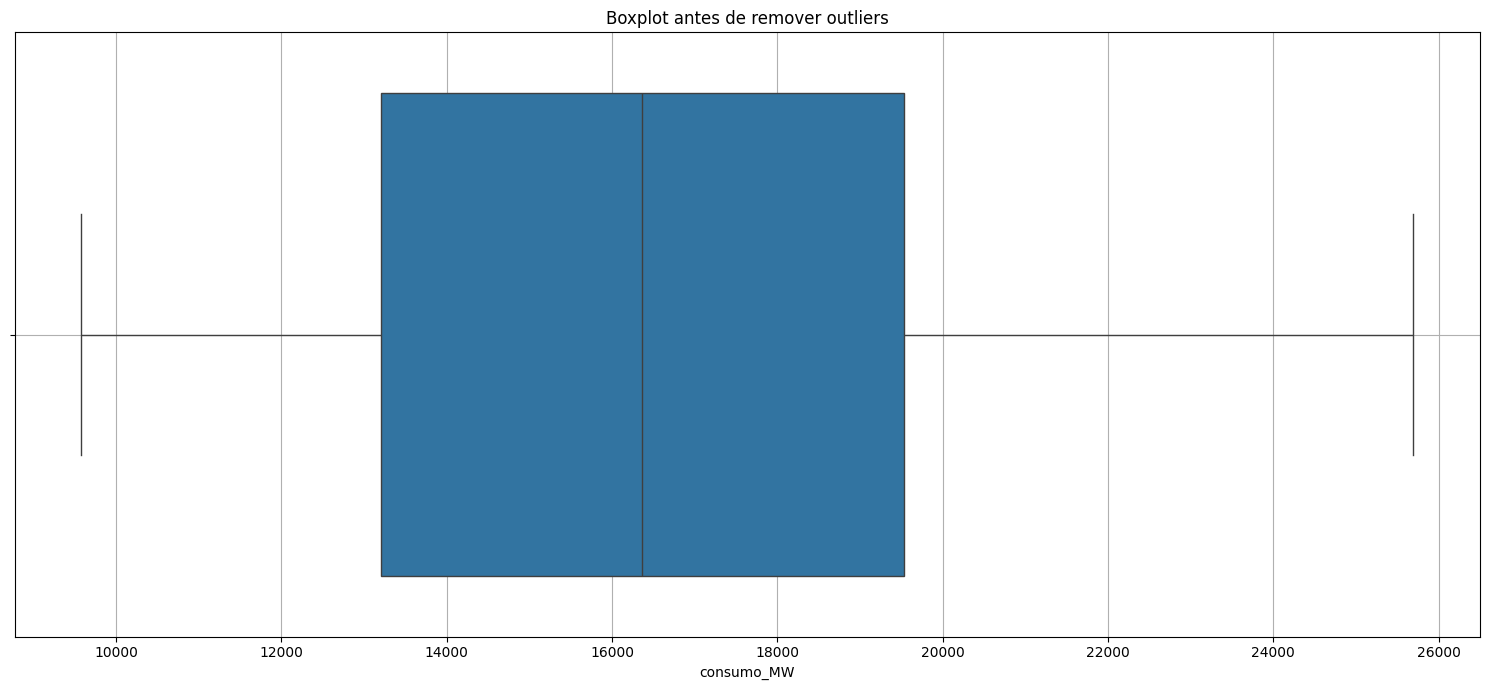

In [20]:
df_detalhes = df_dataset.describe()
display(df_detalhes)

plt.figure(figsize=(15,7))
plt.title('Boxplot antes de remover outliers')
sns.boxplot(x=df_dataset['consumo_MW'])
plt.grid(True)
plt.tight_layout()
plt.show()

,consumo_MW
count,12643.000000
mean,16415.127027
std,3748.575582
min,9581.000000
25%,13205.500000
50%,16366.000000
75%,19528.500000
max,25695.000000


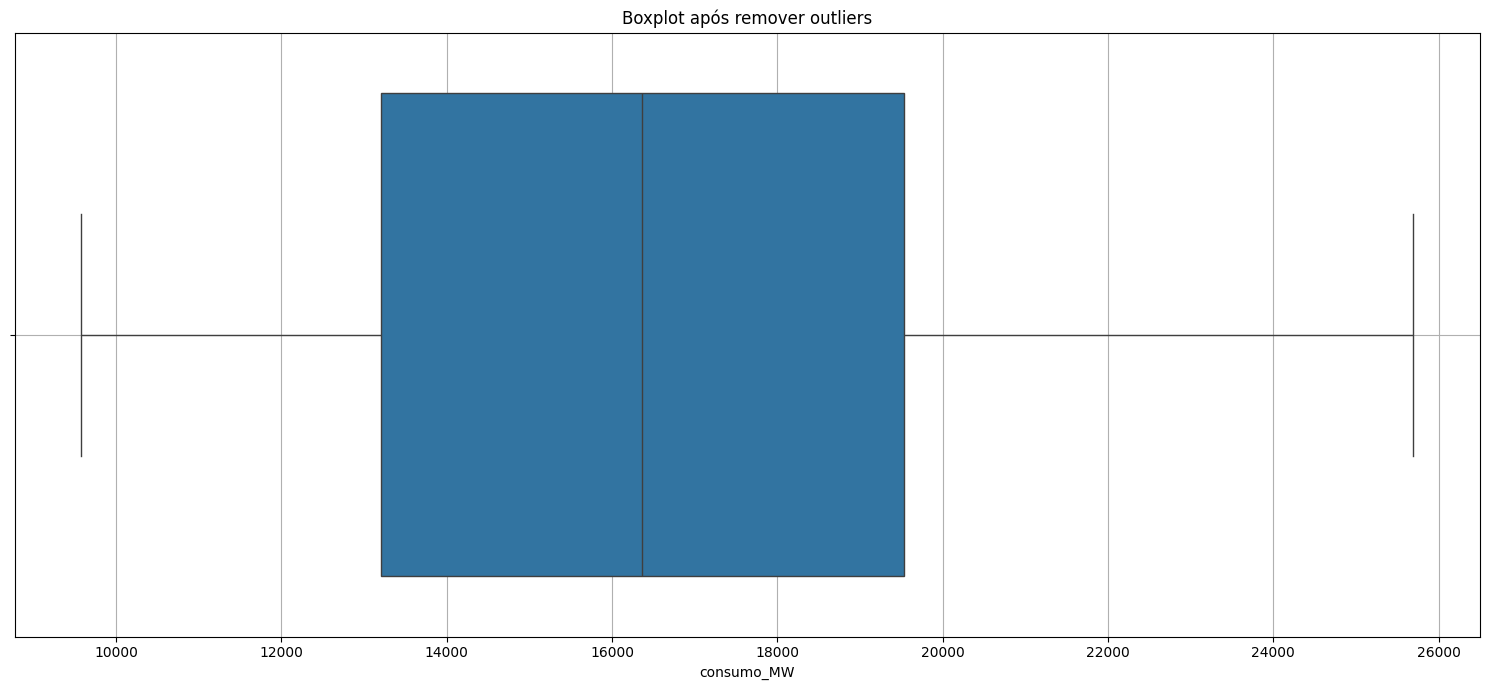

In [21]:
def removeOutliers(df):
    """
    Remove outliers com base no IQR.
    """
    atributo = 'consumo_MW'
    q25, q75 = df[atributo].quantile([0.25, 0.75])
    IQR = q75 - q25
    df = df[(df[atributo] >= (q25 - 1.5*IQR)) & (df[atributo] <= (q75 + 1.5*IQR))]
    return df

df_dataset = removeOutliers(df_dataset)

df_detalhes = df_dataset.describe()
display(df_detalhes)

plt.figure(figsize=(15,7))
plt.title('Boxplot após remover outliers')
sns.boxplot(x=df_dataset['consumo_MW'])
plt.grid(True)
plt.tight_layout()
plt.show()

##Engine Temporal

In [22]:
df_dataset.index = pd.to_datetime(df_dataset.index)

df_dataset['hora'] = df_dataset.index.hour
df_dataset['dia_da_semana'] = df_dataset.index.dayofweek
df_dataset['mes'] = df_dataset.index.month

display(df_dataset.head())

,consumo_MW,hora,dia_da_semana,mes
Datetime,,,,
2004-12-31 01:00:00,13478.0,1,4,12
2004-12-31 02:00:00,12865.0,2,4,12
2004-12-31 03:00:00,12577.0,3,4,12
2004-12-31 04:00:00,12517.0,4,4,12
2004-12-31 05:00:00,12670.0,5,4,12


##Preparar Dados para a Predição

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_dataset[['hora', 'dia_da_semana', 'mes']]
y = df_dataset['consumo_MW']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##Criar e Treinar Modelo

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

modelo = LinearRegression()
modelo.fit(X_train_scaled, y_train)

y_pred = modelo.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R²: {r2:.2f}')

MSE: 7652662.46
RMSE: 2766.34
R²: 0.44


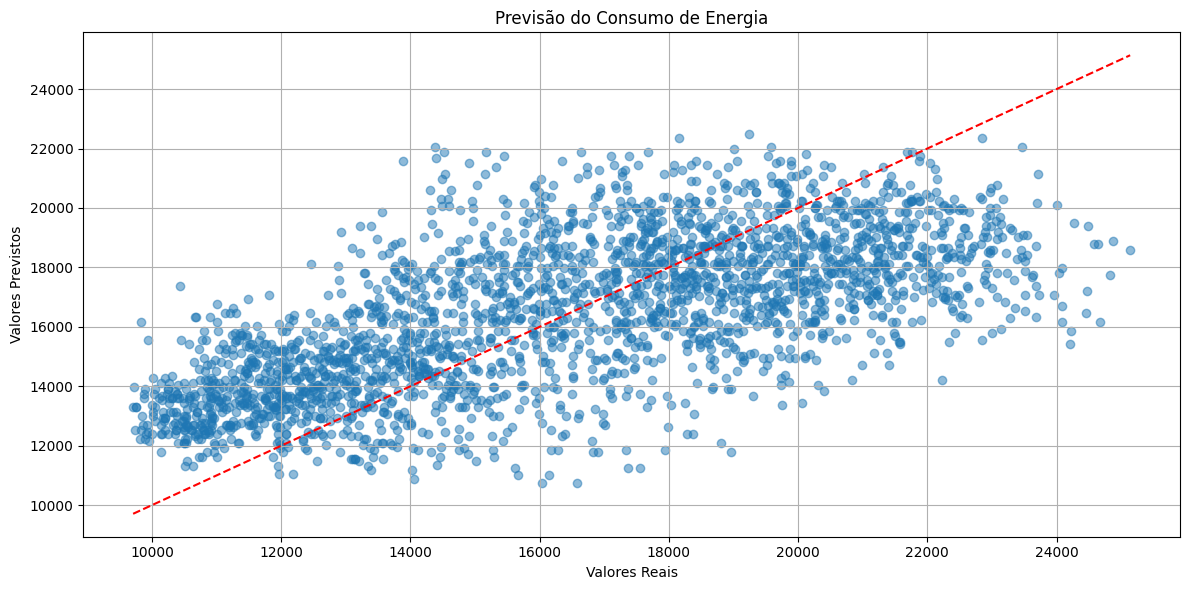

In [25]:
plt.figure(figsize=(12,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.title("Previsão do Consumo de Energia")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.grid(True)
plt.tight_layout()
plt.show()

##Interface Simples de Previsão

In [26]:
def input_validado(prompt, min_val, max_val):
    valor = int(input(prompt))
    if valor < min_val or valor > max_val:
        print(f"Valor inválido! Será usado {min_val}.")
        valor = min_val
    return valor

print("Insira os valores para previsão do consumo de energia:\n")
hora = input_validado("Hora do dia (0 a 23): ", 0, 23)
dia_semana = input_validado("Dia da semana (0=Segunda ... 6=Domingo): ", 0, 6)
mes = input_validado("Mês (1 a 12): ", 1, 12)

novo = pd.DataFrame({'hora': [hora], 'dia_da_semana': [dia_semana], 'mes': [mes]})
novo_scaled = scaler.transform(novo)

previsao = modelo.predict(novo_scaled)[0]

print("\n===================================")
print(f"Consumo de Energia Previsto: {previsao:.2f} MW")
print("===================================")

Insira os valores para previsão do consumo de energia:

Hora do dia (0 a 23): 23
Dia da semana (0=Segunda ... 6=Domingo): 6
Mês (1 a 12): 12

Consumo de Energia Previsto: 17655.48 MW
